### Import Libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plt.style.use("ggplot")
%matplotlib inline

### Import the dataset

In [2]:
df_in = pd.read_csv("dataset-for-Machine-learning.csv")

### Exploratory Data Analysis (EDA)
type(df), df.shape, df.ndim,
df.head(n=6), df.tail(),
df.columns,
df.info(), df.count(), df.dtypes,
df.describe()

In [3]:
print(type(df_in))
print(df_in.shape, df_in.ndim)
print(df_in.columns) # from var0 to var80
df_in.head()

<class 'pandas.core.frame.DataFrame'>
(1012, 81) 2
Index(['var0', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16',
       'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24',
       'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32',
       'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40',
       'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48',
       'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56',
       'var57', 'var58', 'var59', 'var60', 'var61', 'var62', 'var63', 'var64',
       'var65', 'var66', 'var67', 'var68', 'var69', 'var70', 'var71', 'var72',
       'var73', 'var74', 'var75', 'var76', 'var77', 'var78', 'var79', 'var80'],
      dtype='object')


,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.780088,NaN,NaN,NaN,0.803526,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.561473,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.817810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.734438,0.918015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
df_in.describe() # count shows that lots of columns have missing values NaN

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80
count,38.000000,1.000000,6.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,...,659.000000,196.000000,46.000000,28.000000,96.000000,1.000000,3.000000,0.0,13.000000,1012.000000
mean,0.541918,0.353806,0.731267,NaN,0.469247,NaN,NaN,0.428085,NaN,0.761168,...,0.791666,0.824518,0.494588,0.697710,0.605281,0.416034,0.504890,NaN,0.474636,0.599802
std,0.205911,NaN,0.257334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.198237,0.208333,0.146734,0.212055,0.229455,NaN,0.162619,NaN,0.159163,0.490180
min,0.301592,0.353806,0.355660,NaN,0.469247,NaN,NaN,0.428085,NaN,0.761168,...,0.301418,0.302790,0.301601,0.374590,0.301922,0.416034,0.361422,NaN,0.305978,0.000000
25%,0.372851,0.353806,0.548517,NaN,0.469247,NaN,NaN,0.428085,NaN,0.761168,...,0.661520,0.686593,0.402914,0.464248,0.367000,0.416034,0.416564,NaN,0.351445,0.000000
50%,0.450597,0.353806,0.826461,NaN,0.469247,NaN,NaN,0.428085,NaN,0.761168,...,0.873022,0.927602,0.465248,0.791079,0.597592,0.416034,0.471706,NaN,0.421320,1.000000
75%,0.726605,0.353806,0.912303,NaN,0.469247,NaN,NaN,0.428085,NaN,0.761168,...,0.950692,0.986650,0.557554,0.870683,0.827556,0.416034,0.576623,NaN,0.519745,1.000000
max,0.979691,0.353806,0.982232,NaN,0.469247,NaN,NaN,0.428085,NaN,0.761168,...,0.996987,0.999477,0.868537,0.966329,0.994136,0.416034,0.681541,NaN,0.854564,1.000000


In [5]:
#df_in.info() # here the count column is same as the count in describe()
perc_not_null = (df_in.count()/df_in.shape[0])*100 # this gives percentage of non-null entries
print(perc_not_null[perc_not_null>5])
cols_to_select=df_in.columns[df_in.count()>50] # 50 count corresponds to 5% non-null
print(cols_to_select)
print(len(cols_to_select))

var39     39.822134
var41     15.415020
var45     11.363636
var56     15.019763
var58     12.450593
var60      6.027668
var61     58.498024
var68     18.675889
var69     24.802372
var71     65.118577
var72     19.367589
var75      9.486166
var80    100.000000
dtype: float64
Index(['var39', 'var41', 'var45', 'var56', 'var58', 'var60', 'var61', 'var68',
       'var69', 'var71', 'var72', 'var75', 'var80'],
      dtype='object')
13


### Explore target variable

In [6]:
print(type(df_in.var80))
print(df_in.var80.unique())
print(df_in.var80.nunique())

<class 'pandas.core.series.Series'>
[1 0]
2


In [7]:
pd.value_counts(df_in.var80) 

1    607
0    405
Name: var80, dtype: int64

In [8]:
df_in.var80.value_counts()/df_in.shape[0]

1    0.599802
0    0.400198
Name: var80, dtype: float64

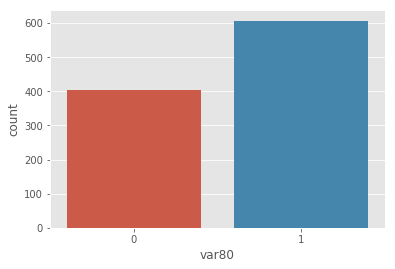

In [9]:
plt.figure()
sns.countplot(x="var80", data=df_in)

### Select columns with > 5% non-null values, 13 columns (12 features + 1 target)

In [10]:
df_final = df_in[cols_to_select]

In [11]:
df_final.columns

Index(['var39', 'var41', 'var45', 'var56', 'var58', 'var60', 'var61', 'var68',
       'var69', 'var71', 'var72', 'var75', 'var80'],
      dtype='object')

In [12]:
df_final.shape

(1012, 13)

In [13]:
df_final.count()

var39     403
var41     156
var45     115
var56     152
var58     126
var60      61
var61     592
var68     189
var69     251
var71     659
var72     196
var75      96
var80    1012
dtype: int64

In [14]:
df_final=df_final.fillna(0, axis=1)
df_final.count()

var39    1012
var41    1012
var45    1012
var56    1012
var58    1012
var60    1012
var61    1012
var68    1012
var69    1012
var71    1012
var72    1012
var75    1012
var80    1012
dtype: int64

In [15]:
df_final.head()

,var39,var41,var45,var56,var58,var60,var61,var68,var69,var71,var72,var75,var80
0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.742548,0.000000,0.000000,0.780088,0.000000,0.803526,1
1,0.310861,0.0,0.0,0.987201,0.887975,0.35675,0.000000,0.984366,0.955945,0.000000,0.000000,0.561473,0
2,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.988848,0.000000,0.000000,0.817810,0.000000,0.000000,1
3,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.998717,0.990744,0.734438,0.918015,0.000000,0
4,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.987820,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [16]:
X = df_final.drop("var80", axis=1)
y = df_final["var80"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [17]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
type(X_train)

(1012, 12)
(1012,)
(809, 12)
(203, 12)


pandas.core.frame.DataFrame

In [18]:
frac_X_train = (X_train.shape[0]/X.shape[0])*100
frac_X_test = (X_test.shape[0]/X.shape[0])*100
print("frac X_train {0:.2f}%, X_test {1:.2f}% ".format(frac_X_train, frac_X_test))

frac X_train 79.94%, X_test 20.06% 


In [19]:
y_test.value_counts()

1    122
0     81
Name: var80, dtype: int64

# Logistic Regression

In [20]:
lr_model = LogisticRegression()
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred_lr_model = lr_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr_model, labels=[1,0]))

[[117   5]
 [  1  80]]


In [23]:
lr_model.score(X_test, y_test)

0.9704433497536946

In [24]:
y_pred_lr_model_prob = lr_model.predict_proba(X_test)

In [25]:
y_pred_lr_model_prob[0:10]

array([[9.64248888e-01, 3.57511116e-02],
       [9.60495837e-01, 3.95041630e-02],
       [1.60620919e-02, 9.83937908e-01],
       [1.71407711e-01, 8.28592289e-01],
       [9.87374334e-01, 1.26256663e-02],
       [9.99434787e-01, 5.65212735e-04],
       [8.42859062e-03, 9.91571409e-01],
       [1.29919682e-02, 9.87008032e-01],
       [1.37102684e-02, 9.86289732e-01],
       [9.99262386e-01, 7.37614376e-04]])

In [26]:
auc_score_lr_model = roc_auc_score(y_test, y_pred_lr_model_prob[:,1])
print("auc score, lr model : ", auc_score_lr_model)

auc score, lr model :  0.9980773122849625


In [27]:
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, y_pred_lr_model_prob[:,1])
print(lr_fpr)
print(lr_tpr)
print(lr_thresholds)

[0.         0.         0.01234568 0.01234568 0.03703704 0.03703704
 0.0617284  0.07407407 0.19753086 0.22222222 0.65432099 0.67901235
 1.        ]
[0.00819672 0.95081967 0.95081967 0.96721311 0.96721311 0.98360656
 0.98360656 1.         1.         1.         1.         1.
 1.        ]
[9.95400470e-01 8.06033724e-01 5.44677307e-01 4.78800400e-01
 3.91624612e-01 3.37523271e-01 3.20294359e-01 3.01979263e-01
 1.44812222e-01 1.11722481e-01 7.70293099e-03 7.27112265e-03
 2.40635402e-04]


Text(0.5,1,'Logistic Regression ROC curve')

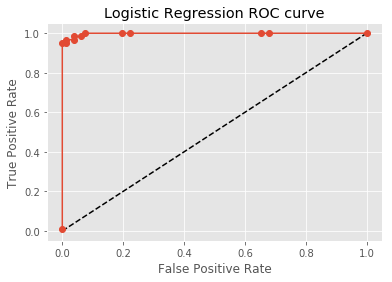

In [28]:
plt.plot([0,1], [0,1], "k--")
plt.plot(lr_fpr, lr_tpr, marker="o", label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC curve")

In [29]:
auc_score_lr_model = roc_auc_score(y_test, y_pred_lr_model_prob[:,1])
print("auc score lr model : ", auc_score_lr_model)

auc score lr model :  0.9980773122849625
